In [11]:
%reload_ext autoreload
%autoreload 2

In [12]:
import sys
sys.path.append('/workspace/deep_birth_death/src/')

In [3]:
import pickle
import itertools
import time
import os
from time import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from evaluation.classification import generate_class_results_calibrate_model, get_classification_results, plot_conf_mat

# Results generation

In [4]:
pickle_path = '/workspace/deep_birth_death/deep_learning/pickles/testing_k/testing_k_sims/'
res_path = "/workspace/deep_birth_death/deep_learning/models/testing_k_sims/class/"
n_tips = ['489']
for i in n_tips:
    with open(pickle_path + "dataset_" + i + "_10k.pkl", 'rb') as f:
        data = pickle.load(f)
        
    print(data["y_class_test"].shape)

(6000, 6)


In [5]:
pickle_path = '/workspace/deep_birth_death/deep_learning/pickles/testing_k/testing_k_sims/'
res_path = "/workspace/deep_birth_death/deep_learning/models/testing_k_sims/class/"

n_tips = ['674', '489', '87']

n_trees_tested = 6000
results_calibrated_model = dict()

for i in n_tips:
    with open(pickle_path + "dataset_" + i + "_10k.pkl", 'rb') as f:
        data = pickle.load(f)

    results_calibrated_model[i] = dict()
        
    model_path = res_path + i + "_classification_"

    print('---', i, 'tips ---')
    
    
    results_calibrated_model[i] = generate_class_results_calibrate_model(model_path, data['X_test'][:n_trees_tested],
                                        data['y_class_test'][:n_trees_tested])

--- 674 tips ---
nan


/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


--- 489 tips ---
nan


/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


--- 87 tips ---
0.98030454


In [6]:
for i in n_tips:
    print(str(results_calibrated_model[i]["temperature"]))
    
    with open("/workspace/deep_birth_death/deep_learning/temperatures/temperatures_testing_k/temperature_" + i +".txt", "w") as archivo:
        archivo.write(str(results_calibrated_model[i]["temperature"]))

nan
nan
0.98030454


# Results summary

In [7]:
get_classification_results(results_calibrated_model)

,674,489,87
accuracy,0.172,0.166167,0.789833
F1-Score,0.048919,0.047497,0.787843
Recall,0.166667,0.166667,0.788254
Precision,0.028667,0.027694,0.789843
Number of params,53110,14006,11446
Train time,358.134779,282.857288,1600.730229


# Results summary calibrated model

In [8]:
get_classification_results(results_calibrated_model)

,674,489,87
accuracy,0.172,0.166167,0.789833
F1-Score,0.048919,0.047497,0.787843
Recall,0.166667,0.166667,0.788254
Precision,0.028667,0.027694,0.789843
Number of params,53110,14006,11446
Train time,358.134779,282.857288,1600.730229


In [9]:
results_calibrated_model["87"]["temperature"]

0.98030454

# Confusion Matrices

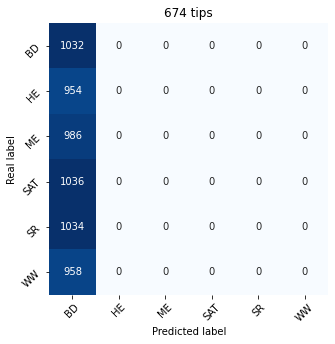

              precision    recall  f1-score   support

           0     0.1720    1.0000    0.2935      1032
           1     0.0000    0.0000    0.0000       954
           2     0.0000    0.0000    0.0000       986
           3     0.0000    0.0000    0.0000      1036
           4     0.0000    0.0000    0.0000      1034
           5     0.0000    0.0000    0.0000       958

    accuracy                         0.1720      6000
   macro avg     0.0287    0.1667    0.0489      6000
weighted avg     0.0296    0.1720    0.0505      6000



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


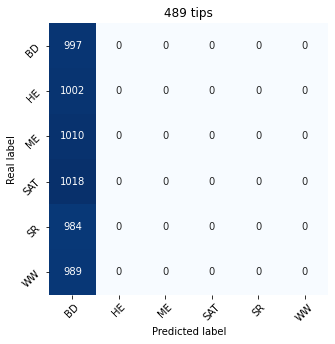

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0     0.1662    1.0000    0.2850       997
           1     0.0000    0.0000    0.0000      1002
           2     0.0000    0.0000    0.0000      1010
           3     0.0000    0.0000    0.0000      1018
           4     0.0000    0.0000    0.0000       984
           5     0.0000    0.0000    0.0000       989

    accuracy                         0.1662      6000
   macro avg     0.0277    0.1667    0.0475      6000
weighted avg     0.0276    0.1662    0.0474      6000



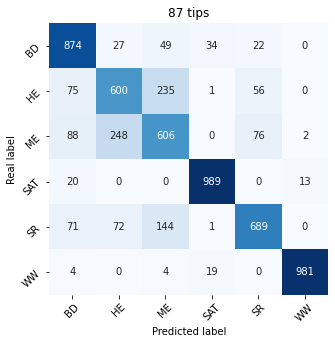

              precision    recall  f1-score   support

           0     0.7721    0.8688    0.8176      1006
           1     0.6336    0.6205    0.6270       967
           2     0.5838    0.5941    0.5889      1020
           3     0.9473    0.9677    0.9574      1022
           4     0.8173    0.7052    0.7571       977
           5     0.9849    0.9732    0.9790      1008

    accuracy                         0.7898      6000
   macro avg     0.7898    0.7883    0.7878      6000
weighted avg     0.7907    0.7898    0.7891      6000



In [10]:
label_names = ["BD", "HE", "ME", "SAT", "SR", "WW"]
for i in results_calibrated_model:
    plot_conf_mat((results_calibrated_model[i]["y_pred"]), (results_calibrated_model[i]["y_test"]), label_names, i)

# Train History

In [6]:
def train_plot(ax, i, metric):
    ax.plot(results[i]['history'][metric],
            linestyle='-', label='Train', color='blue', linewidth=.7)
    ax.plot(results[i]['history']['val_' + metric],
            linestyle='--', label='Validation', color='blue', linewidth=.7)
    

    ax.set_xlabel('Epoch')
    ax.set_ylabel(metric)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    ax.set_title(i)

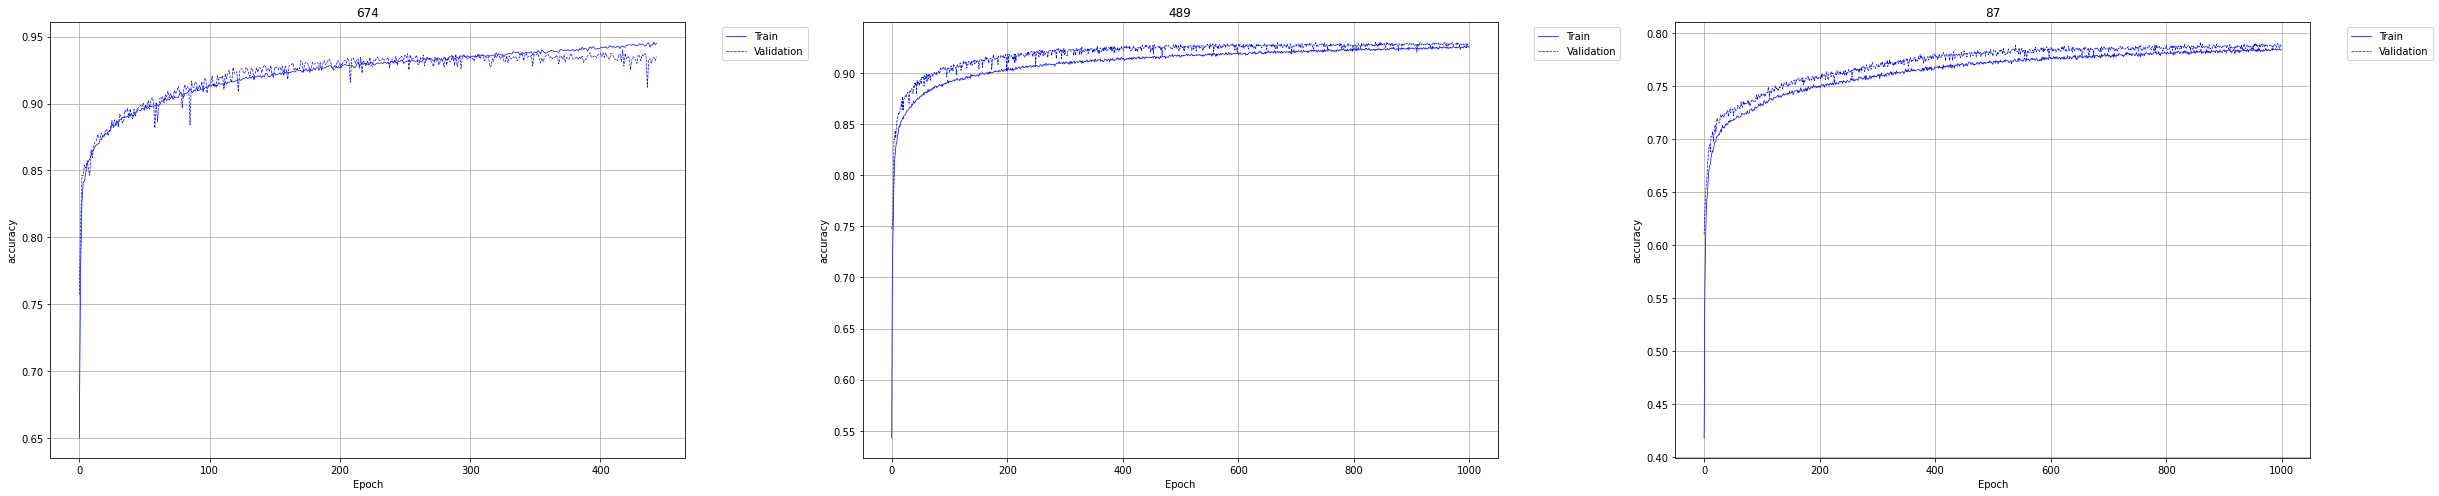

In [7]:
fig, ax = plt.subplots(1, len(n_tips), figsize=(40,7))
for i, j in enumerate(n_tips):
    train_plot(ax[i], j, 'accuracy')
    ax[i].grid(True)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

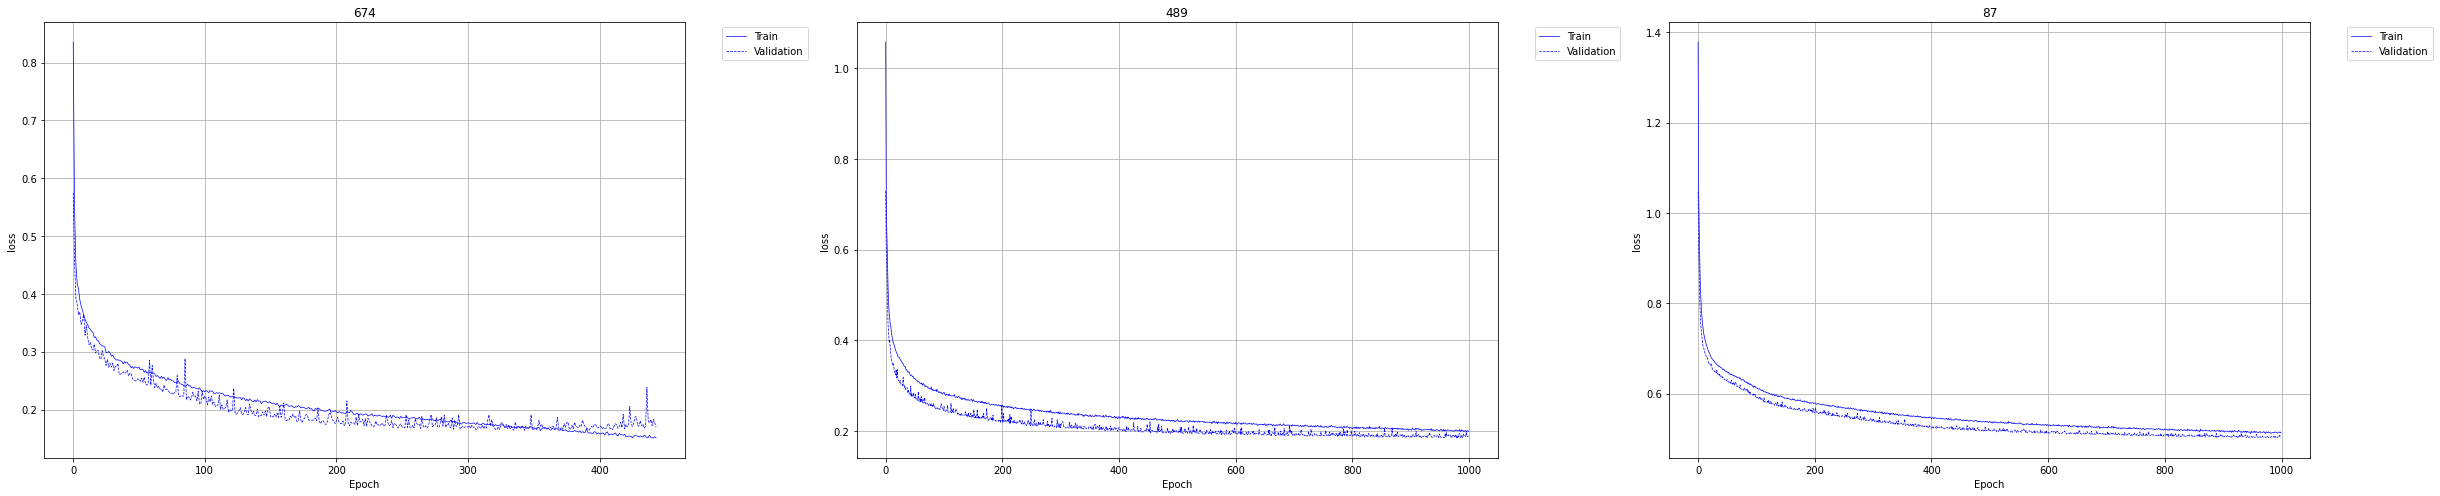

In [8]:
fig, ax = plt.subplots(1, len(n_tips), figsize=(40,7))
for i, j in enumerate(n_tips):
    train_plot(ax[i], j, 'loss')
    ax[i].grid(True)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

## Results stratified

<AxesSubplot:xlabel='N_tips'>

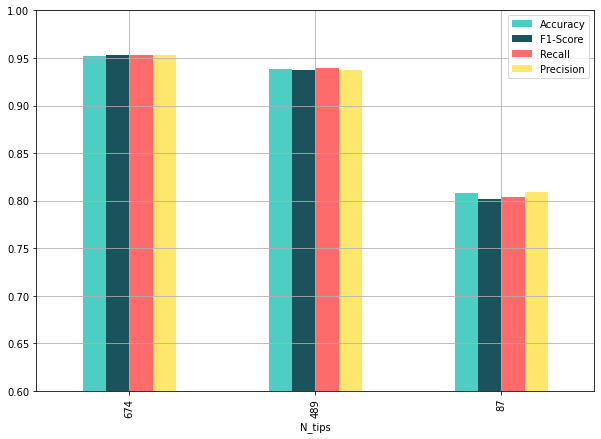

In [9]:
df = pd.DataFrame({ 
    'N_tips': n_tips, 
    'Accuracy': [results[i]['accuracy'] for i in n_tips],
    'F1-Score': [results[i]['f1-score'] for i in n_tips],
    'Recall': [results[i]['recall'] for i in n_tips],
    'Precision': [results[i]['precision'] for i in n_tips],
})

df.plot(x="N_tips", y=["Accuracy", "F1-Score", "Recall", "Precision"], kind="bar",
        color=['#4ECDC4','#1A535C','#FF6B6B','#FFE66D'], figsize=(10,7),
        ylim=(0.6, 1), grid=True)

### Number of Params

<AxesSubplot:xlabel='N_tips'>

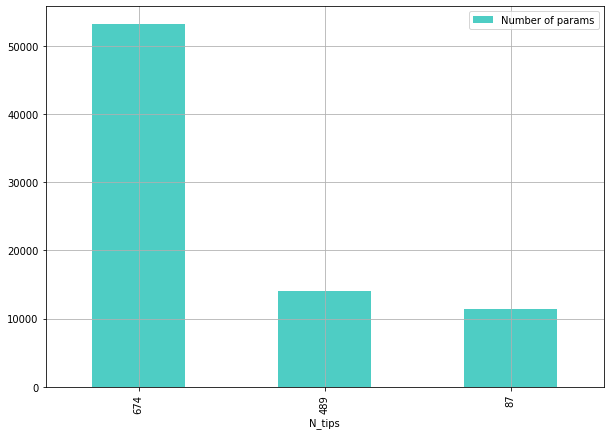

In [10]:
df = pd.DataFrame({ 
    'N_tips': n_tips, 
    'Number of params': [results[i]['n_params'] for i in n_tips],
})

df.plot(x="N_tips", y=["Number of params"], kind="bar",
        color=['#4ECDC4'], figsize=(10,7), grid=True)

### Training time

<AxesSubplot:xlabel='N_tips'>

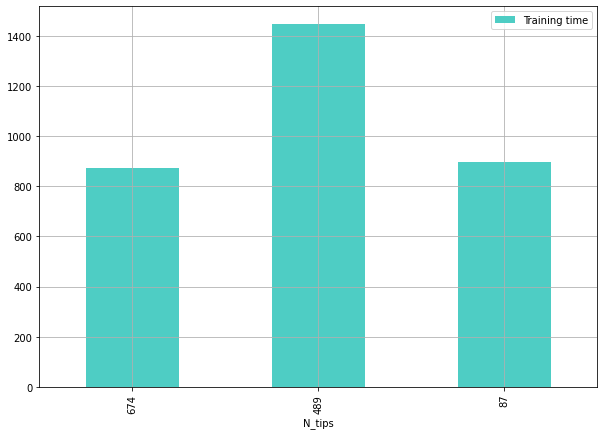

In [11]:
df = pd.DataFrame({ 
    'N_tips': n_tips, 
    'Training time': [results[i]['train_time'] for i in n_tips],
})

df.plot(x="N_tips", y=["Training time"], kind="bar",
        color=['#4ECDC4'], figsize=(10,7), grid=True)